# <center><span style="color:purple">Exploratory Data Analysis on Social Buzz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

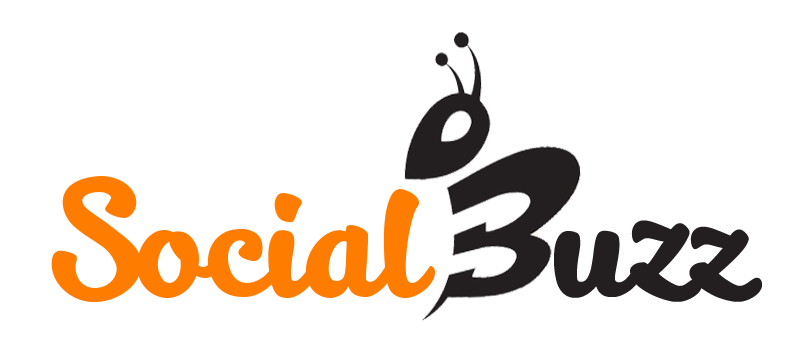

In [2]:
#load data
content = pd.read_csv('Content (1).csv')
reactions = pd.read_csv('Reactions (1).csv')
reaction_types = pd.read_csv('ReactionTypes (1).csv')
profile= pd.read_csv('Profile (1).csv')
session = pd.read_csv('Session (1).csv')


In [3]:
content.drop('Unnamed: 0',axis=1,inplace=True)
reactions.drop(['Unnamed: 0','User ID'],axis=1,inplace=True)
reaction_types.drop('Unnamed: 0',axis=1,inplace=True)
profile.drop('Unnamed: 0',axis=1,inplace=True)
session.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df = content.merge(profile, how='left', on='User ID')
df = df.merge(session, how='left', on='User ID')
df = df.merge(reactions, how='left', on='Content ID')
df = df.rename(columns={'Type_x':'Cont_Type','Type_y':'Type'})
df = df.merge(reaction_types, how='left', on='Type')
df = df.rename(columns={'Type':'React_Type'})


In [5]:
df.head()

,Content ID,User ID,Cont_Type,Category,URL,Interests,Age,Device,Duration,React_Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,"['education', 'studying']",13,Microsoft,10,NaN,2021-04-22 15:17:15,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,"['education', 'studying']",13,Microsoft,10,disgust,2020-11-07 09:43:50,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,"['education', 'studying']",13,Microsoft,10,dislike,2021-06-17 12:22:51,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,"['education', 'studying']",13,Microsoft,10,scared,2021-04-18 05:13:58,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,"['education', 'studying']",13,Microsoft,10,disgust,2021-01-06 19:13:01,negative,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25573 entries, 0 to 25572
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Content ID  25573 non-null  object 
 1   User ID     25573 non-null  object 
 2   Cont_Type   25573 non-null  object 
 3   Category    25573 non-null  object 
 4   URL         20857 non-null  object 
 5   Interests   25573 non-null  object 
 6   Age         25573 non-null  int64  
 7   Device      25573 non-null  object 
 8   Duration    25573 non-null  int64  
 9   React_Type  24573 non-null  object 
 10  Datetime    25553 non-null  object 
 11  Sentiment   24573 non-null  object 
 12  Score       24573 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 2.7+ MB


In [7]:
df.isnull().sum()

Content ID       0
User ID          0
Cont_Type        0
Category         0
URL           4716
Interests        0
Age              0
Device           0
Duration         0
React_Type    1000
Datetime        20
Sentiment     1000
Score         1000
dtype: int64

In [8]:
df.drop(['URL','Interests'],axis=1,inplace=True)

In [9]:
df.head()

,Content ID,User ID,Cont_Type,Category,Age,Device,Duration,React_Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,NaN,2021-04-22 15:17:15,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,disgust,2020-11-07 09:43:50,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,dislike,2021-06-17 12:22:51,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,scared,2021-04-18 05:13:58,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,disgust,2021-01-06 19:13:01,negative,0.0


In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25572
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Content ID  24573 non-null  object 
 1   User ID     24573 non-null  object 
 2   Cont_Type   24573 non-null  object 
 3   Category    24573 non-null  object 
 4   Age         24573 non-null  int64  
 5   Device      24573 non-null  object 
 6   Duration    24573 non-null  int64  
 7   React_Type  24573 non-null  object 
 8   Datetime    24573 non-null  object 
 9   Sentiment   24573 non-null  object 
 10  Score       24573 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [12]:
df.head()

,Content ID,User ID,Cont_Type,Category,Age,Device,Duration,React_Type,Datetime,Sentiment,Score
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,disgust,2020-11-07 09:43:50,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,dislike,2021-06-17 12:22:51,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,scared,2021-04-18 05:13:58,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,disgust,2021-01-06 19:13:01,negative,0.0
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,interested,2020-08-23 12:25:58,positive,30.0


In [13]:
df['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', 'Culture', '"food"', 'Food',
       '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [14]:
#address the reapted column (especially for categorical varibale)!!
df['Category']= df['Category'].replace('"', '', regex=True)
df['Category']=df['Category'].str.lower()

In [15]:
df['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [16]:
df.to_csv('data.csv', index = False)

In [17]:
df.groupby('Category').agg({"React_Type" : "count"}).reset_index().sort_values(by='React_Type', ascending=False).head(5)

,Category,React_Type
0,animals,1897
9,science,1796
7,healthy eating,1717
6,food,1699
12,technology,1698


In [18]:
df.groupby('Category').agg({"Score" : "sum"}).reset_index().sort_values(by='Score', ascending=False).head()

,Category,Score
0,animals,74965.0
9,science,71168.0
7,healthy eating,69339.0
12,technology,68738.0
6,food,66676.0


# <center><span style="color:red">Thank You